In [1]:
import cv2
import numpy as np
import torch
import ultralytics
from ultralytics import YOLO

In [2]:
model = YOLO('fpbt_model.pt')

In [3]:
model.predict('sample_ss.jpg')

c:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



image 1/1 c:\Users\user\Downloads\football project\Py file for YOLO\sample_ss.jpg: 384x640 1 ball, 1 referee, 9 soccer-players, 235.1ms
Speed: 0.0ms preprocess, 235.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ball', 1: 'goalkeeper', 2: 'referee', 3: 'soccer-player'}
 obb: None
 orig_img: array([[[ 95,  52,  62],
         [104,  60,  71],
         [104,  58,  69],
         ...,
         [255, 217, 211],
         [223, 175, 168],
         [229, 181, 174]],
 
        [[103,  60,  71],
         [109,  64,  75],
         [107,  61,  72],
         ...,
         [255, 218, 212],
         [224, 175, 168],
         [230, 181, 174]],
 
        [[ 83,  40,  51],
         [ 94,  49,  60],
         [ 89,  43,  54],
         ...,
         [228, 181, 175],
         [230, 181, 174],
         [232, 183, 176]],
 
        ...,
 
        [[ 15, 137,  81],
         [ 15, 137,  81],
         [ 15, 137,  81],
         ...,
         [ 23, 130,  80],
         [ 23, 130,  80],
         [ 23, 130,  80]],
 
        [[ 15, 136,  81],
         [ 15, 136,  81],
         

In [4]:
pwd

'c:\\Users\\user\\Downloads\\football project\\Py file for YOLO'

In [5]:
from typing import Generator
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

%matplotlib inline

In [6]:
def frame_create(video_file: str) -> Generator[np.ndarray, None, None]:
  cap = cv2.VideoCapture(video_file)
  if cap.isOpened() == False:
    print("Error opening video stream or file")
  else:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
          break

        yield frame

    cap.release()

In [7]:
def frame_plot(frame):
  plt.figure(figsize=(16,16))
  plt.imshow(frame)
  plt.show()

In [8]:
frame_iterator = iter(frame_create(video_file="sample.mp4"))

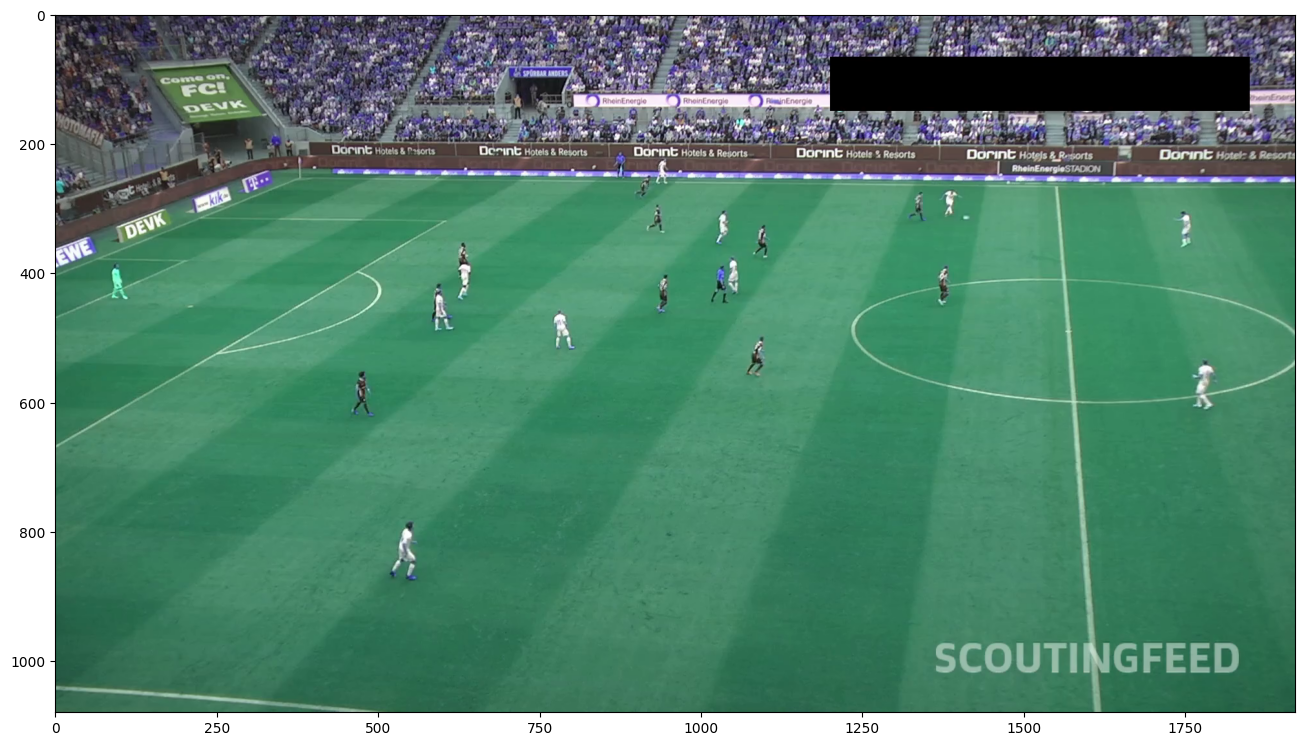

In [9]:
frame = next(frame_iterator)
#frame = 'sample_ss.jpg'
frame_plot(frame)

In [10]:
result = model(frame,conf=0.2)


0: 384x640 1 goalkeeper, 17 soccer-players, 271.8ms
Speed: 25.5ms preprocess, 271.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
model.names

{0: 'ball', 1: 'goalkeeper', 2: 'referee', 3: 'soccer-player'}

In [12]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ball', 1: 'goalkeeper', 2: 'referee', 3: 'soccer-player'}
 obb: None
 orig_img: array([[[ 72,  76,  71],
         [ 72,  76,  71],
         [ 63,  66,  64],
         ...,
         [ 60,  55,  69],
         [ 67,  61,  78],
         [ 67,  61,  78]],
 
        [[ 55,  59,  54],
         [ 65,  69,  64],
         [ 65,  68,  66],
         ...,
         [ 60,  55,  69],
         [ 72,  66,  83],
         [ 74,  68,  85]],
 
        [[ 33,  36,  34],
         [ 47,  50,  48],
         [ 57,  59,  61],
         ...,
         [ 62,  56,  73],
         [ 81,  74,  93],
         [ 87,  80,  99]],
 
        ...,
 
        [[ 60, 106,  78],
         [ 60, 106,  78],
         [ 60, 106,  78],
         ...,
         [ 37,  95,  70],
         [ 37,  95,  70],
         [ 37,  95,  70]],
 
        [[ 62, 105,  78],
         [ 62, 105,  78],
         

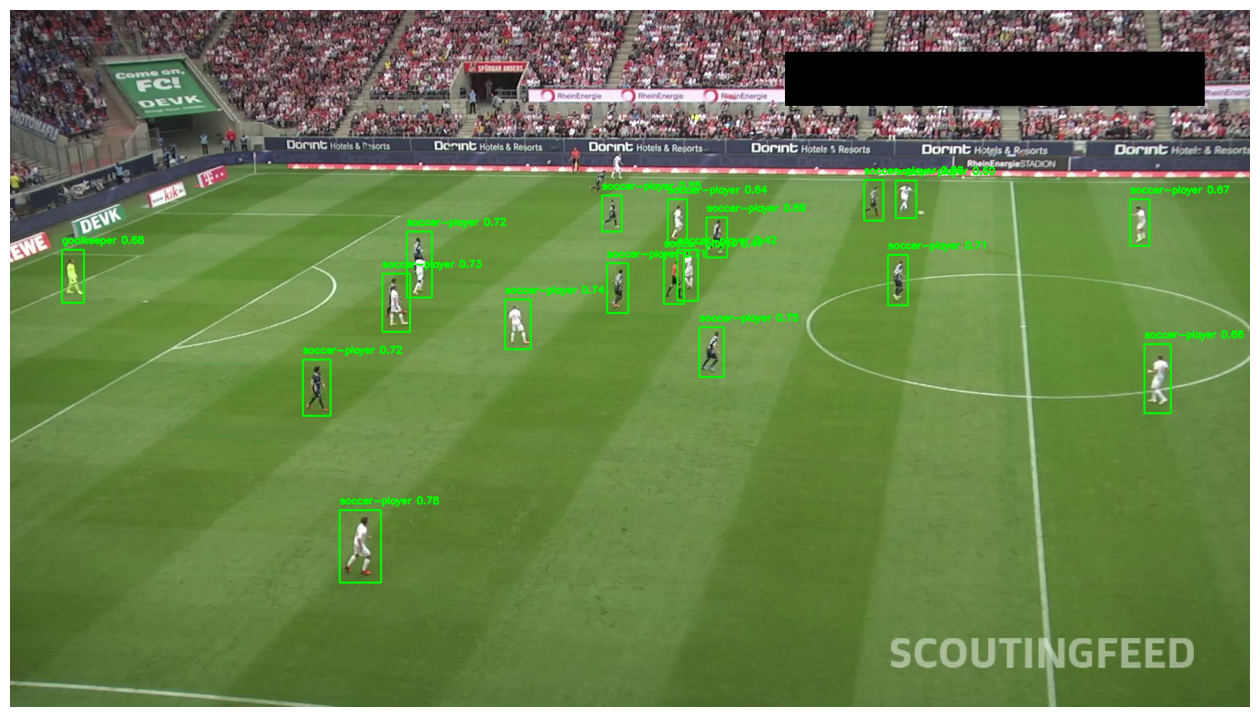

In [13]:
for r in result:
    image = r.orig_img.copy()

    boxes = r.boxes.xyxy.cpu().numpy()  
    labels = r.boxes.cls.cpu().numpy()  
    confidences = r.boxes.conf.cpu().numpy()  
    names = r.names  


    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box[:4])
        label = int(labels[i])
        confidence = confidences[i]
        class_name = names[label]
        
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        label_text = f'{class_name} {confidence:.2f}'
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(16, 16))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [14]:
from tqdm.notebook import tqdm
from dataclasses import dataclass
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any

In [15]:
@dataclass(frozen=True)
class Point:
    x: float
    y: float

    @property
    def int_xy_tuple(self) -> Tuple[int, int]:
        return int(self.x), int(self.y)


@dataclass(frozen=True)
class Rect:
    x: float
    y: float
    width: float
    height: float

    @property
    def min_x(self) -> float:
        return self.x

    @property
    def min_y(self) -> float:
        return self.y

    @property
    def max_x(self) -> float:
        return self.x + self.width

    @property
    def max_y(self) -> float:
        return self.y + self.height

    @property
    def top_left(self) -> Point:
        return Point(x=self.x, y=self.y)

    @property
    def bottom_right(self) -> Point:
        return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
        return Rect(
            x=self.x - padding,
            y=self.y - padding,
            width=self.width + 2*padding,
            height=self.height + 2*padding
        )

    def contains_point(self, point: Point) -> bool:
        return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y


@dataclass
class Detection:
    rect: Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_results(cls, pred: np.ndarray, names: Dict[int, str]) -> List[Detection]:
        result = []
        for x_min, y_min, x_max, y_max, confidence, class_id in pred:
            class_id=int(class_id)
            result.append(Detection(
                rect=Rect(
                    x=float(x_min),
                    y=float(y_min),
                    width=float(x_max - x_min),
                    height=float(y_max - y_min)
                ),
                class_id=class_id,
                class_name=names[class_id],
                confidence=float(confidence)
            ))
        return result


def filter_detections_by_class(detections: List[Detection], class_name: str) -> List[Detection]:
    return [
        detection
        for detection
        in detections
        if detection.class_name == class_name
    ]


@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int

    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

    @classmethod
    def from_hex_string(cls, hex_string: str) -> Color:
        r, g, b = tuple(int(hex_string[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
        return Color(r=r, g=g, b=b)


def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, thickness)
    return image


def draw_filled_rect(image: np.ndarray, rect: Rect, color: Color) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, -1)
    return image


def draw_polygon(image: np.ndarray, countour: np.ndarray, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, thickness)
    return image


def draw_filled_polygon(image: np.ndarray, countour: np.ndarray, color: Color) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, -1)
    return image


def draw_text(image: np.ndarray, anchor: Point, text: str, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.4, color.bgr_tuple, thickness, 2, False)
    return image


def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color.bgr_tuple,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image


@dataclass
class BaseAnnotator:
    colors: List[Color]
    thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_ellipse(
                image=image,
                rect=detection.rect,
                color=self.colors[detection.class_id],
                thickness=self.thickness
            )
        return annotated_image


@dataclass(frozen=True)
class DeepSORTArgs:
    max_age: int = 30
    n_init: int = 3
    nn_budget: int = 100
    max_iou_distance: float = 0.7
    max_cosine_distance: float = 0.5
    min_confidence: float = 0.3
    use_appearance: bool = True

In [16]:
# black
MARKER_CONTOUR_COLOR_HEX = "000000"
MARKER_CONTOUR_COLOR = Color.from_hex_string(MARKER_CONTOUR_COLOR_HEX)

# red
PLAYER_MARKER_FILL_COLOR_HEX = "FF0000"
PLAYER_MARKER_FILL_COLOR = Color.from_hex_string(PLAYER_MARKER_FILL_COLOR_HEX)

# green
BALL_MERKER_FILL_COLOR_HEX = "00FF00"
BALL_MARKER_FILL_COLOR = Color.from_hex_string(BALL_MERKER_FILL_COLOR_HEX)

MARKER_CONTOUR_THICKNESS = 2
MARKER_WIDTH = 20
MARKER_HEIGHT = 20
MARKER_MARGIN = 10

# distance in pixels from the player's bounding box where we consider the ball is in his possession
PLAYER_IN_POSSESSION_PROXIMITY = 25

In [17]:
def calculate_marker(anchor: Point) -> np.ndarray:
    x, y = anchor.int_xy_tuple
    return(np.array([
        [x - MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN],
        [x, y - MARKER_MARGIN],
        [x + MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN]
    ]))


def draw_marker(image: np.ndarray, anchor: Point, color: Color) -> np.ndarray:
    possession_marker_countour = calculate_marker(anchor=anchor)
    image = draw_filled_polygon(
        image=image,
        countour=possession_marker_countour,
        color=color)
    image = draw_polygon(
        image=image,
        countour=possession_marker_countour,
        color=MARKER_CONTOUR_COLOR,
        thickness=MARKER_CONTOUR_THICKNESS)
    return image


@dataclass
class MarkerAnntator:

    color: Color

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_marker(
                image=image,
                anchor=detection.rect.top_center,
                color=self.color)
        return annotated_image


def get_player_in_possession(
    player_detections: List[Detection],
    ball_detections: List[Detection],
    proximity: int
) -> Optional[Detection]:
    if len(ball_detections) != 1:
        return None
    ball_detection = ball_detections[0]
    for player_detection in player_detections:
        if player_detection.rect.pad(proximity).contains_point(point=ball_detection.rect.center):
            return player_detection

In [18]:
# white
BALLCOLOR = "#FFFFFF"
BALL_COLOR = Color.from_hex_string(BALLCOLOR)

# black
GK_COLOR = "000000"
GOALKEEPER_COLOR = Color.from_hex_string(GK_COLOR)

# green
PLAYER = "FF0000"
PLAYER_COLOR = Color.from_hex_string(PLAYER)

# red
REFEREE = "#09E85E"
REFEREE_COLOR = Color.from_hex_string(REFEREE)

COLORS = [
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS = 2

In [19]:
ball_marker = MarkerAnntator(color=BALL_MARKER_FILL_COLOR)
player_marker = MarkerAnntator(color=PLAYER_MARKER_FILL_COLOR)

In [20]:
frame

array([[[ 72,  76,  71],
        [ 72,  76,  71],
        [ 63,  66,  64],
        ...,
        [ 60,  55,  69],
        [ 67,  61,  78],
        [ 67,  61,  78]],

       [[ 55,  59,  54],
        [ 65,  69,  64],
        [ 65,  68,  66],
        ...,
        [ 60,  55,  69],
        [ 72,  66,  83],
        [ 74,  68,  85]],

       [[ 33,  36,  34],
        [ 47,  50,  48],
        [ 57,  59,  61],
        ...,
        [ 62,  56,  73],
        [ 81,  74,  93],
        [ 87,  80,  99]],

       ...,

       [[ 60, 106,  78],
        [ 60, 106,  78],
        [ 60, 106,  78],
        ...,
        [ 37,  95,  70],
        [ 37,  95,  70],
        [ 37,  95,  70]],

       [[ 62, 105,  78],
        [ 62, 105,  78],
        [ 62, 105,  78],
        ...,
        [ 36,  93,  71],
        [ 36,  93,  71],
        [ 36,  93,  71]],

       [[ 60, 103,  76],
        [ 60, 103,  76],
        [ 60, 103,  76],
        ...,
        [ 35,  92,  70],
        [ 36,  93,  71],
        [ 36,  93,  71]]


0: 384x640 1 goalkeeper, 17 soccer-players, 204.2ms
Speed: 4.0ms preprocess, 204.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


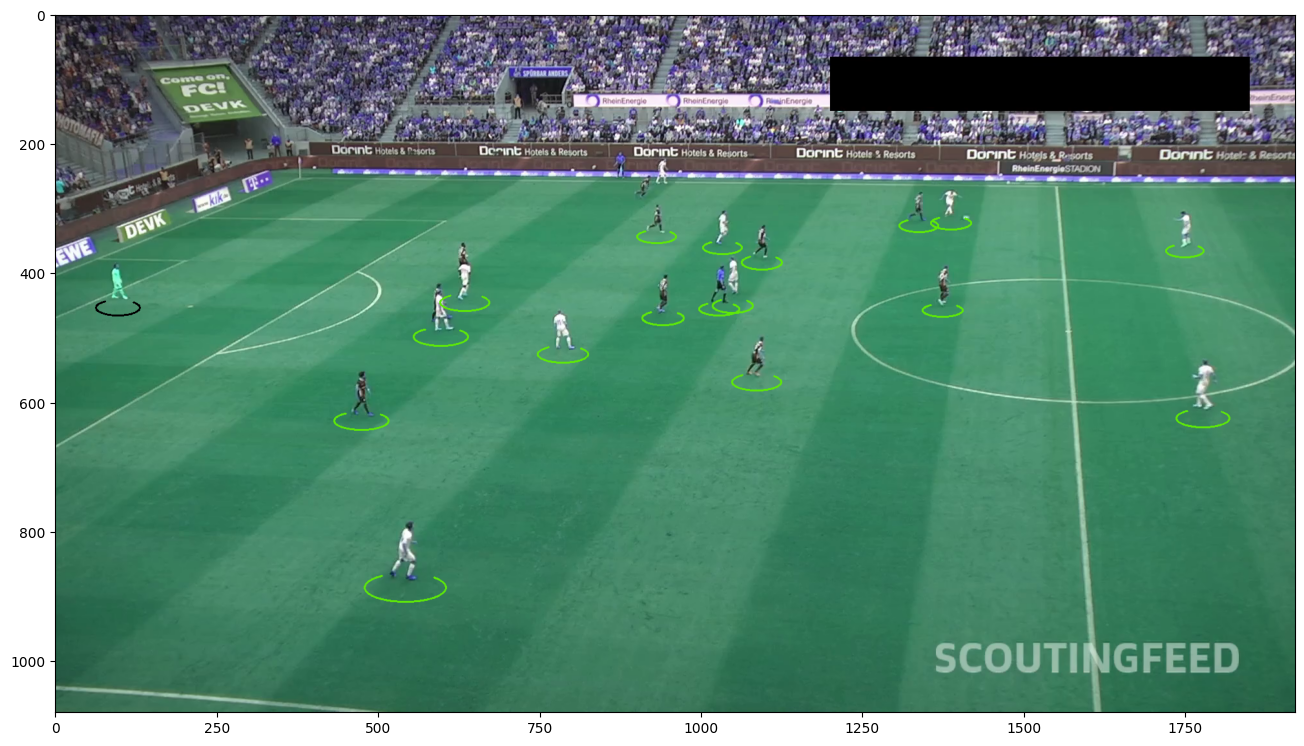

In [21]:
frame_iterator = iter(frame_create(video_file="sample.mp4"))

annotator = BaseAnnotator(
    colors=COLORS,
    thickness=THICKNESS)

frame = next(frame_iterator)
#frame = cv2.imread('sample_ss.jpg')

results = model(frame)
first_result = results[0]

boxes = first_result.boxes


if hasattr(boxes, 'xyxy'):
    pred = boxes.xyxy.cpu().numpy()  
    conf = boxes.conf.cpu().numpy()  
    class_id = boxes.cls.cpu().numpy()  

    
    pred = np.concatenate([pred, conf[:, None], class_id[:, None]], axis=1)

    
    detections = Detection.from_results(pred=pred, names=model.names)


annotated_image = annotator.annotate(image=frame, detections=detections)


frame_plot(annotated_image)


0: 384x640 1 goalkeeper, 17 soccer-players, 241.3ms
Speed: 5.5ms preprocess, 241.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


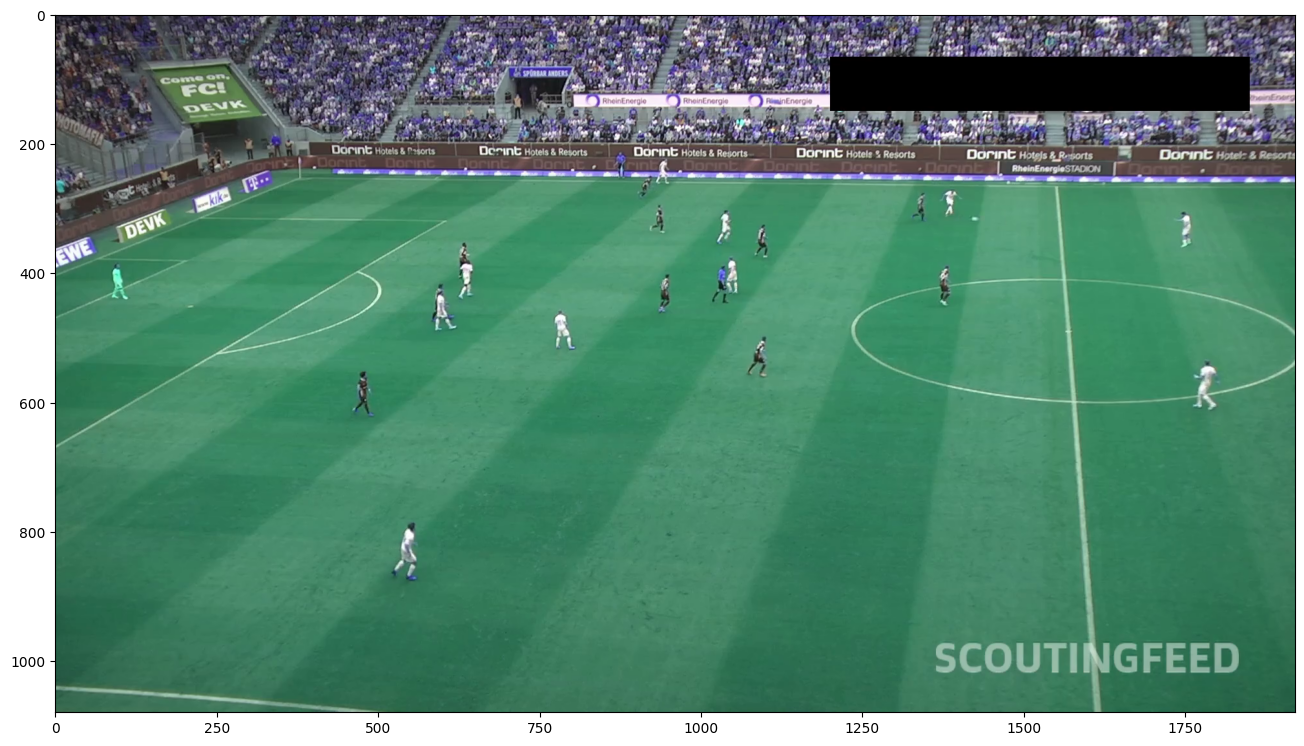

In [22]:
frame = next(frame_iterator)

results = model(frame)
first_result = results[0]

boxes = first_result.boxes


if hasattr(boxes, 'xyxy'):
    pred = boxes.xyxy.cpu().numpy()  
    conf = boxes.conf.cpu().numpy()  
    class_id = boxes.cls.cpu().numpy()  

    
    pred = np.concatenate([pred, conf[:, None], class_id[:, None]], axis=1)

    
    detections = Detection.from_results(pred=pred, names=model.names)


ball_detections = filter_detections_by_class(detections=detections, class_name="ball")

player_detections = filter_detections_by_class(detections=detections, class_name="player")

player_in_possession_detection = get_player_in_possession(
    player_detections=player_detections,
    ball_detections=ball_detections,
    proximity=PLAYER_IN_POSSESSION_PROXIMITY)


annotated_image = frame.copy()

annotated_image = ball_marker.annotate(
    image=annotated_image,
    detections=ball_detections)

annotated_image = player_marker.annotate(
    image=annotated_image,
    detections=[player_in_possession_detection] if player_in_possession_detection else [])


frame_plot(annotated_image)

In [23]:
SOURCE_VIDEO = r'C:\Users\user\Downloads\football project\Py file for YOLO\sample.mp4'
TARGET_VIDEO = r'C:\Users\user\Downloads\football project\Py file for YOLO\prediction.mp4'

In [24]:
@dataclass(frozen=True)
class VideoConfig:
    fps: float
    width: int
    height: int


def get_video_writer(target_video_path: str, video_config: VideoConfig) -> cv2.VideoWriter:
    video_target_dir = os.path.dirname(os.path.abspath(target_video_path))
    os.makedirs(video_target_dir, exist_ok=True)
    return cv2.VideoWriter(
        target_video_path,
        fourcc=cv2.VideoWriter_fourcc(*"mp4v"),
        fps=video_config.fps,
        frameSize=(video_config.width, video_config.height),
        isColor=True
    )


video_config = VideoConfig(
    fps=30,
    width=1920,
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO,
    video_config=video_config)

In [25]:
frame_iterator = iter(frame_create(video_file=SOURCE_VIDEO))

ball_marker = MarkerAnntator(color=BALL_MARKER_FILL_COLOR)
player_marker = MarkerAnntator(color=PLAYER_MARKER_FILL_COLOR)

In [26]:
annotator = BaseAnnotator(
    colors=COLORS,
    thickness=THICKNESS)

In [27]:
for frame in tqdm(frame_iterator, total=750):

    results = model(frame)
    results = model(frame)
    first_result = results[0]

    boxes = first_result.boxes


    if hasattr(boxes, 'xyxy'):
        pred = boxes.xyxy.cpu().numpy()  
        conf = boxes.conf.cpu().numpy()  
        class_id = boxes.cls.cpu().numpy()  
        pred = np.concatenate([pred, conf[:, None], class_id[:, None]], axis=1)
        detections = Detection.from_results(pred=pred, names=model.names)

    annotated_image = annotator.annotate(image=frame, detections=detections)

    
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player") + goalkeeper_detections
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    
    annotated_image = frame.copy()
    annotated_image = ball_marker.annotate(
        image=annotated_image,
        detections=ball_detections)
    annotated_image = player_marker.annotate(
        image=annotated_image,
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    video_writer.write(annotated_image)

video_writer.release()

  0%|          | 0/750 [00:00<?, ?it/s]


0: 384x640 1 goalkeeper, 17 soccer-players, 212.2ms
Speed: 0.0ms preprocess, 212.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 soccer-players, 255.1ms
Speed: 15.6ms preprocess, 255.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 soccer-players, 233.9ms
Speed: 0.0ms preprocess, 233.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 soccer-players, 200.0ms
Speed: 7.5ms preprocess, 200.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 soccer-players, 223.9ms
Speed: 0.0ms preprocess, 223.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 soccer-players, 224.3ms
Speed: 4.0ms preprocess, 224.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 soccer-players, 277.4ms
Speed: 0.0ms preprocess, 277.4ms inferen